In [1]:
import pandas as pd
df=pd.read_csv('cleaned_laptop_price_data')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,GPU,Operating System,Price,Screen Resolution,Touchscreen,CPU_Manufacturer,GPU_Manufacturer,Frequency,RAM(in GB),Weight(in Kg),Storage1(in GB),Storage1_Type,Storage2(in GB)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 640,macOS,11912523.48,2560x1600,0,Intel,Intel,2.3GHz,8.0,1.37,128,SSD,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,Intel HD Graphics 6000,macOS,7993374.48,1440x900,0,Intel,Intel,1.8GHz,8.0,1.34,128,FlashStorage,0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,Intel HD Graphics 620,No OS,5112900.00,1920x1080,0,Intel,Intel,2.5GHz,8.0,1.86,256,SSD,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,AMD Radeon Pro 455,macOS,22563005.40,2880x1800,0,Intel,AMD,2.7GHz,16.0,1.83,512,SSD,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 650,macOS,16037611.20,2560x1600,0,Intel,Intel,3.1GHz,8.0,1.37,256,SSD,0


In [2]:
# Reorder columns to move 'price' to the end
columns = [col for col in df.columns if col != 'Price'] + ['Price']
df = df[columns]



In [3]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,GPU,Operating System,Screen Resolution,Touchscreen,CPU_Manufacturer,GPU_Manufacturer,Frequency,RAM(in GB),Weight(in Kg),Storage1(in GB),Storage1_Type,Storage2(in GB),Price
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 640,macOS,2560x1600,0,Intel,Intel,2.3GHz,8.0,1.37,128,SSD,0,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,Intel HD Graphics 6000,macOS,1440x900,0,Intel,Intel,1.8GHz,8.0,1.34,128,FlashStorage,0,7993374.48
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,Intel HD Graphics 620,No OS,1920x1080,0,Intel,Intel,2.5GHz,8.0,1.86,256,SSD,0,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,AMD Radeon Pro 455,macOS,2880x1800,0,Intel,AMD,2.7GHz,16.0,1.83,512,SSD,0,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 650,macOS,2560x1600,0,Intel,Intel,3.1GHz,8.0,1.37,256,SSD,0,16037611.20


## ENCODING

In [4]:
columns_to_encode=[col for col in df.columns if col!= 'Price']

In [5]:
columns_to_encode

['Manufacturer',
 'Model Name',
 'Category',
 'Screen Size',
 'CPU',
 'GPU',
 'Operating System',
 'Screen Resolution',
 'Touchscreen',
 'CPU_Manufacturer',
 'GPU_Manufacturer',
 'Frequency',
 'RAM(in GB)',
 'Weight(in Kg)',
 'Storage1(in GB)',
 'Storage1_Type',
 'Storage2(in GB)']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder=LabelEncoder()

In [8]:
for column in columns_to_encode:
    df[column]=encoder.fit_transform(df[column])

In [9]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,GPU,Operating System,Screen Resolution,Touchscreen,CPU_Manufacturer,GPU_Manufacturer,Frequency,RAM(in GB),Weight(in Kg),Storage1(in GB),Storage1_Type,Storage2(in GB),Price
0,1,300,4,7,51,58,6,10,0,1,2,15,3,37,5,3,0,11912523.48
1,1,301,4,7,51,51,6,1,0,1,2,9,3,34,5,0,0,7993374.48
2,7,50,3,14,57,53,4,3,0,1,2,18,3,72,7,3,0,5112900.00
3,1,300,4,13,65,9,6,12,0,1,0,21,5,69,10,3,0,22563005.40
4,1,300,4,7,51,59,6,10,0,1,2,25,3,37,7,3,0,16037611.20


In [10]:
import numpy as np
# Applying logarithmic transformation to remove right skewness
df['Price_transformed'] = np.sqrt(df['Price'])



In [11]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,GPU,Operating System,Screen Resolution,Touchscreen,CPU_Manufacturer,GPU_Manufacturer,Frequency,RAM(in GB),Weight(in Kg),Storage1(in GB),Storage1_Type,Storage2(in GB),Price,Price_transformed
0,1,300,4,7,51,58,6,10,0,1,2,15,3,37,5,3,0,11912523.48,3451.452373
1,1,301,4,7,51,51,6,1,0,1,2,9,3,34,5,0,0,7993374.48,2827.255645
2,7,50,3,14,57,53,4,3,0,1,2,18,3,72,7,3,0,5112900.00,2261.172262
3,1,300,4,13,65,9,6,12,0,1,0,21,5,69,10,3,0,22563005.40,4750.053200
4,1,300,4,7,51,59,6,10,0,1,2,25,3,37,7,3,0,16037611.20,4004.698640


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
scaler = StandardScaler()

# Fit on the data and transform
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Optionally, if you want to overwrite the original df with scaled values
df = df_scaled



In [14]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,GPU,Operating System,Screen Resolution,Touchscreen,CPU_Manufacturer,GPU_Manufacturer,Frequency,RAM(in GB),Weight(in Kg),Storage1(in GB),Storage1_Type,Storage2(in GB),Price,Price_transformed
0,-1.334500,-0.040613,1.135978,-1.375070,-0.489814,0.144030,1.439432,2.254169,-0.414769,0.216548,-0.039029,-0.228561,0.170204,-1.140922,-1.159855,0.705393,-0.43654,0.292992,0.446345
1,-1.334500,-0.034756,1.135978,-1.375070,-0.489814,-0.179267,1.439432,-0.678911,-0.414769,0.216548,-0.039029,-1.188519,0.170204,-1.215578,-1.159855,-2.165759,-0.43654,-0.336197,-0.227528
2,0.130939,-1.504696,0.333296,0.555179,-0.153262,-0.086896,-0.803793,-0.027116,-0.414769,0.216548,-0.039029,0.251418,0.170204,-0.269931,-0.305719,0.705393,-0.43654,-0.798635,-0.838662
3,-1.334500,-0.040613,1.135978,0.279429,0.295473,-2.119044,1.439432,2.905964,-0.414769,0.216548,-2.200921,0.731396,1.542606,-0.344587,0.975485,0.705393,-0.43654,2.002843,1.848293
4,-1.334500,-0.040613,1.135978,-1.375070,-0.489814,0.190215,1.439432,2.254169,-0.414769,0.216548,-0.039029,1.371368,0.170204,-1.140922,-0.305719,0.705393,-0.43654,0.955242,1.043620


In [15]:
df.drop('Price',axis=1,inplace=True)

In [16]:
import seaborn as sns

<Axes: xlabel='Price_transformed', ylabel='Count'>

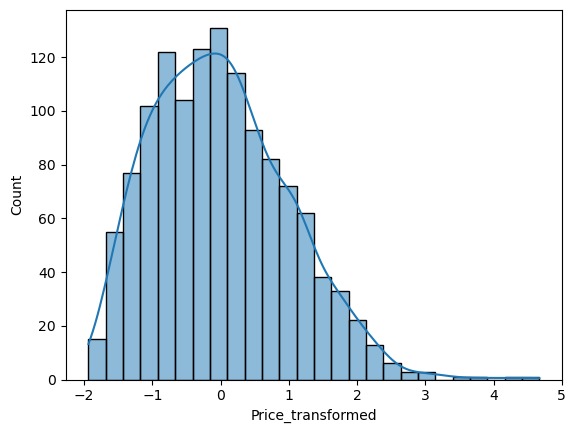

In [17]:
sns.histplot(df['Price_transformed'],kde=True)

## Applying ML Algorithms

In [19]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,GPU,Operating System,Screen Resolution,Touchscreen,CPU_Manufacturer,GPU_Manufacturer,Frequency,RAM(in GB),Weight(in Kg),Storage1(in GB),Storage1_Type,Storage2(in GB),Price_transformed
0,-1.334500,-0.040613,1.135978,-1.375070,-0.489814,0.144030,1.439432,2.254169,-0.414769,0.216548,-0.039029,-0.228561,0.170204,-1.140922,-1.159855,0.705393,-0.43654,0.446345
1,-1.334500,-0.034756,1.135978,-1.375070,-0.489814,-0.179267,1.439432,-0.678911,-0.414769,0.216548,-0.039029,-1.188519,0.170204,-1.215578,-1.159855,-2.165759,-0.43654,-0.227528
2,0.130939,-1.504696,0.333296,0.555179,-0.153262,-0.086896,-0.803793,-0.027116,-0.414769,0.216548,-0.039029,0.251418,0.170204,-0.269931,-0.305719,0.705393,-0.43654,-0.838662
3,-1.334500,-0.040613,1.135978,0.279429,0.295473,-2.119044,1.439432,2.905964,-0.414769,0.216548,-2.200921,0.731396,1.542606,-0.344587,0.975485,0.705393,-0.43654,1.848293
4,-1.334500,-0.040613,1.135978,-1.375070,-0.489814,0.190215,1.439432,2.254169,-0.414769,0.216548,-0.039029,1.371368,0.170204,-1.140922,-0.305719,0.705393,-0.43654,1.043620


In [20]:
X=df.iloc[:,:-1]
y=df['Price_transformed']

Results:
                        R2 Score      RMSE
Linear Regression      0.759547  0.486057
Ridge Regression       0.759566  0.486038
Lasso Regression      -0.000645  0.991544
ElasticNet Regression  0.244416  0.861616
Decision Tree          0.837641  0.399402
Random Forest          0.895659  0.320184
Gradient Boosting      0.903715  0.307576
AdaBoost               0.785560  0.459012
XGBoost                0.914430  0.289956


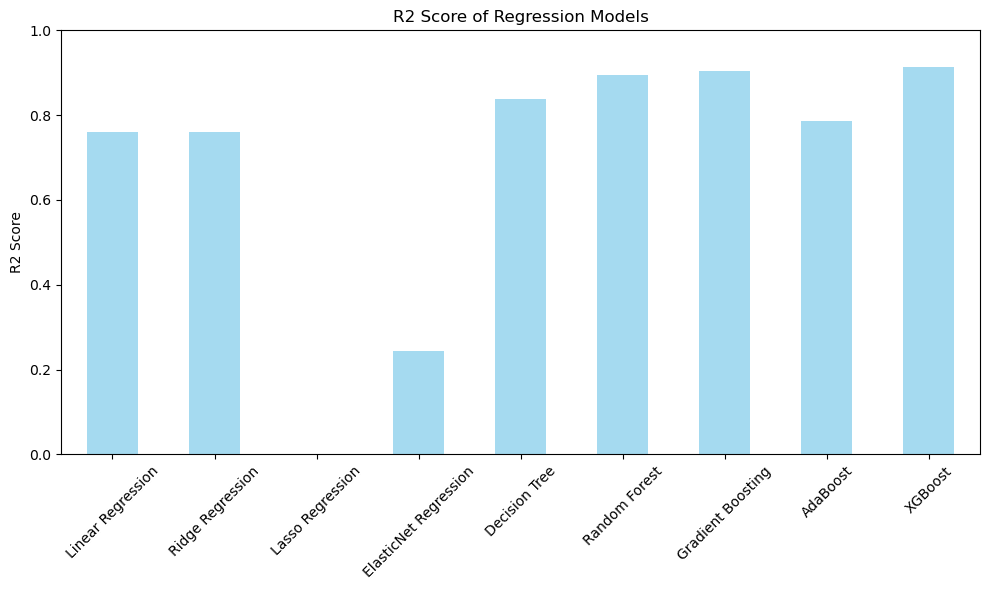

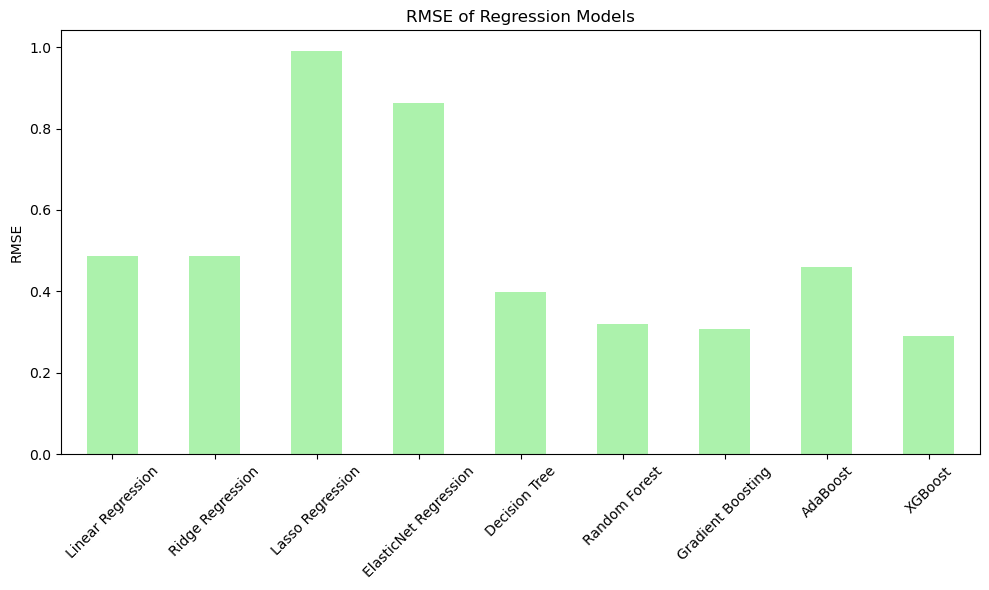

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Initialize all regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

# DataFrame to store results
results_df = pd.DataFrame(columns=['R2 Score', 'RMSE'])

### Step 2: Fit models and evaluate on test data

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate R2 score and RMSE
    r2 = r2_score(y_test, y_pred)
    error = rmse(y_test, y_pred)
    
    # Store results in dataframe
    results_df.loc[name] = [r2, error]

### Step 3: Display and visualize results

# Display results DataFrame
print("Results:\n", results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
results_df['R2 Score'].plot(kind='bar', color='skyblue', alpha=0.75, ylim=(0, 1))
plt.title('R2 Score of Regression Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
results_df['RMSE'].plot(kind='bar', color='lightgreen', alpha=0.75)
plt.title('RMSE of Regression Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Implementing Xgboost model with Hyperparameter tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
xgb = XGBRegressor()



In [38]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [100, 200, 300]
}

rs_cv = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, cv=5, 
                           scoring='neg_mean_squared_error', random_state=42)


In [39]:
rs_cv.fit(X, y)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.5, 0.7, 0.9]},
                   random_state=42, scoring='neg_mean_squared_error')

In [46]:
best_xgb = rs_cv.best_estimator_

# Predict on the training set
y_pred = best_xgb.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2 Score: {r2}')
print(f'RMSE: {rmse}')


R^2 Score: 0.9867379692353017
RMSE: 0.11415029936803928


In [54]:
 ## Save The Model

In [53]:
# Save the model to a file using pickle
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

## Xgboost model has best accuracy of 98.6 % and rmse of 0.114